![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de una bicicleta durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://github.com/justmarkham/DAT8/blob/master/data/bikeshare.csv), [dicccionario de datos](https://www.kaggle.com/c/bike-sharing-demand/data).

### Datos prestamo de bicicletas

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier

In [3]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)
# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)
# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour
# Visualización
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables hour y workingday, escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [4]:
# Celda 1.1
bikes.groupby('workingday').total.mean()


workingday
0    188.506621
1    193.011873
Name: total, dtype: float64

In [5]:
# Celda 1.2
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

In [6]:
bikes[['hour', 'workingday']].describe()

,hour,workingday
count,10886.000000,10886.000000
mean,11.541613,0.680875
std,6.915838,0.466159
min,0.000000,0.000000
25%,6.000000,0.000000
50%,12.000000,1.000000
75%,18.000000,1.000000
max,23.000000,1.000000


Conclusiones: De lo anterior se puede concluir que los workingdays el promedio de las bicicletas rentadas es mayor  al promedio de los días que no son "workingday". Es decir que la cantidad de bicicletas que se rentan es mayor en los días que las personas trabajan, se puede inferir que las personas utilizan este medio de transporte para ir a trabajar.

Las horas en las cual se realiza en promedio un mayor numero de rentas de bicicletas es entre las 17 y 18 horas, posiblemente cuando las personas salen del trabajo a sus hogares. En promedio se rentan 11,54 bicicletas en una hora. el maximo de bicicletas rentadas en una hora es de 23 y es posible que en una hora no se rente ninguna bicicleta 

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica de las rentas promedio por hora cuando la variable "workingday" es igual a 0 e igual a 1, respectivamente. Analice y escriba sus hallazgos.

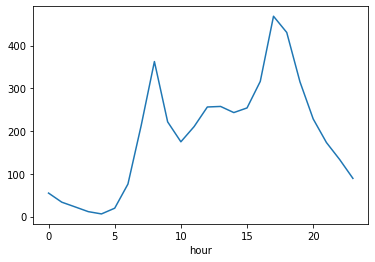

In [7]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

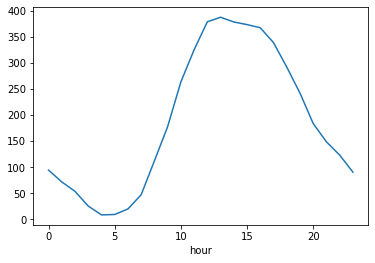

In [8]:
# Celda 2.2 - "workingday"=0 escriba su código y hallazgos 
df_0 = bikes.query('workingday == 0')
df_0.groupby('hour').total.mean().plot()

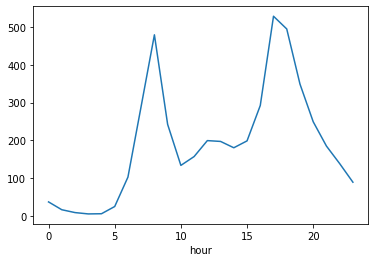

In [9]:
# Celda 2.3 - "workingday"=1 escriba su código y hallazgos 
df_1 = bikes.query('workingday == 1')
df_1.groupby('hour').total.mean().plot()

Conclusión: Cuando se tiene el Workingdays total, es decir tanto los días laborales como no, se presentan 2 picos durante el día uno en las horas de la mañana al rededor de las 8 de la mañana y otro en la tarde al rededor de las 17 horas.

En cambio los días que no son laborales tienen un comportamiento diferentes, al rededor de las 11 a 18 horas se presenta una meseta de alquiler de bicicletas y al rededor de 5 un minimo de prestamos.

Para los días laborales, encontramos un comportamiento similiar al total, con dos picos durante el día, al rededor de las 8 y a las 17 horas

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "hour" y "workingday" como las únicas variables predictoras. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [10]:
# Celda 3
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
yTotal=bikes.total.to_numpy() #Variable de respuesta
XTotal=bikes[['hour', 'workingday']].to_numpy() #Variables predictora

XTrain, XTest, yTrain, yTest = train_test_split(XTotal, yTotal, test_size=0.33, random_state=0)

n_alphas = 200
alphasCalibrar = np.logspace(-10, 2, n_alphas)
modeloRidge = RidgeCV(alphas=alphasCalibrar,store_cv_values=True).fit(XTotal, yTotal)
prediccionRidge=modeloRidge.predict(XTest)
MSERidge=np.average(np.square(prediccionRidge-yTest))
MSERidge

print('Los coeficientes estimados son:')
print(modeloRidge.coef_)
print('MSE regresión con penalización tipo Ridge:')
print(MSERidge)



Los coeficientes estimados son:
[10.49007883  3.90737636]
MSE regresión con penalización tipo Ridge:
27634.233075280044


 Conclusión: El 1 coeficiente indica que por cada hora adicional  se puede esperar que el total de bicicletas rentada aumente un promedio de 10.49 y el coeficiente 2 indica que si el día es laboral se espera un aumento en la renta de bicicletas de 3,973.
 
La limitación es que al ser un modelo lineal este trata de ajustarse linealmente a los datos, pero en este caso el comportamiento de los datos no tienen un comportamiento lineal. Los modelos lineales son poco flexibles, este modelo por su falta de flexibilidad puede ser muy sesgado.

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "workingday". El árbol debe tener al menos 6 nodos finales.

In [11]:
# Celda 4


### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "hour" y "workingday" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

In [12]:
# Celda 5

max_depth_range = range(1, 200)
accuracy_scores = []

for depth in max_depth_range:

    clf_Tree = DecisionTreeClassifier(max_depth=depth, random_state=1)
    accuracy_scores.append(cross_val_score(clf_Tree, XTotal, yTotal, cv=10, scoring='accuracy').mean())
    

sorted(zip(accuracy_scores, max_depth_range))[::-1][0]

clf_Tree = DecisionTreeClassifier(max_depth=4, random_state=1)
clf_Tree.fit(XTotal, yTotal)

    
prediccionTree=clf_Tree.predict_proba(XTest)[:,0]
MSETree=np.average(np.square(prediccionTree-yTest))
print('MSE de un Modelo de Arbol:')
print(MSETree)

MSE de un Modelo de Arbol:
70905.51524862826


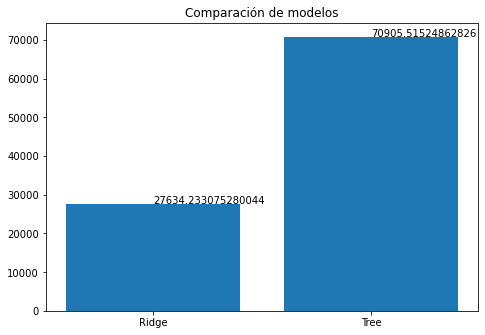

In [13]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de modelos")
ejeX = ['Ridge','Tree' ]
ejeY = [MSERidge,MSETree]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

Conclusión: Si se compara el desempeño del modelo del lineal Ridge y el modelo Tree, podemos encontrar que el Rigde tiene un mejor desempeño ya que este tiene un MSE (Error cuadratico Medio) mejor. Los valores más bajos de MSE indican un mejor ajuste

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la populridad esta dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el sigueinte enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [14]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [15]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [16]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

(0.6353333333333333, 2)

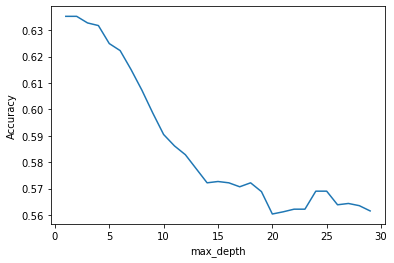

In [17]:
# Celda 6
#Arbol
max_depth_range = range(1, 30)
accuracy_scores = []

for depth in max_depth_range:

    clfTree = DecisionTreeClassifier(max_depth=depth, random_state=1)
    accuracy_scores.append(cross_val_score(clfTree, X, y, cv=10, scoring='accuracy').mean())
    
plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

mejor=sorted(zip(accuracy_scores, max_depth_range))[::-1][0]
mejor




In [20]:
clfTree = DecisionTreeClassifier(max_depth=2, random_state=1)
clfTree.fit(X, y)
y_pred_tree = clfTree.predict(X_test)
metrics.f1_score(y_pred_tree, y_test), metrics.accuracy_score(y_pred_tree, y_test)

(0.6448598130841121, 0.6453333333333333)

In [24]:
#Regresion Logistica

clfRegLog= LogisticRegression(random_state=0,max_iter=1000)
clfRegLog.fit(X,y)

y_pred_RL = clfRegLog.predict(X_test)
metrics.f1_score(y_pred_RL, y_test), metrics.accuracy_score(y_pred_RL, y_test)

(0.609353507565337, 0.6213333333333333)

Conclusión: Se realiza la prediccion con los dos modelos y a través de las dos metricas podemos concluir que el arbol presenta un mejor desempeño de predicción, teniendo un F1 score mas alto. Esto quiere decir que  este modelo tiene mejor precisión y es mas exhaustivo que el de regresion logistica. Adicionalmente el acurracy Score tambien nos indica que este es mejor ya que esta metrica mide el porcentaje de casos que el modelo ha acertado.

### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged para cada uno de los siguientes escenarios:

-100 árboles de decisión donde max_depth = None\
-100 árboles de decisión donde max_depth = 2\
-100 regresiones logísticas

Evalúe los modelos utilizando las métricas de Accuracy y F1-Score.

In [27]:
# Celda 7

#Votación Mayoritaria 100 árboles de decisión donde max_depth = None

clf_7_1 = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth = None),n_estimators=100, bootstrap=True,random_state=42, n_jobs=-1, oob_score=True)
    
clf_7_1.fit(X_train, y_train)
y_pred_7_1 = clf_7_1.predict(X_test)
metrics.f1_score(y_pred_7_1, y_test), metrics.accuracy_score(y_pred_7_1, y_test)

(0.6447368421052632, 0.64)

In [42]:
# Celda 7

#Votación Mayoritaria 100  regresiones logísticas

clf_7_2 = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),n_estimators=100, bootstrap=True,random_state=42, n_jobs=-1, oob_score=True)
    
clf_7_2.fit(X_train, y_train)
y_pred_7_2 = clf_7_2.predict(X_test)
metrics.f1_score(y_pred_7_2, y_test), metrics.accuracy_score(y_pred_7_2, y_test)

(0.6439545758183033, 0.6446666666666667)

In [44]:
# Celda 7

#Votación Mayoritaria 100 árboles de decisión donde max_depth = 2

clf_7_3 = BaggingClassifier(base_estimator=LogisticRegression(),n_estimators=100, bootstrap=True,random_state=42, n_jobs=-1, oob_score=True)
    
clf_7_3.fit(X_train, y_train)
y_pred_7_3 = clf_7_3.predict(X_test)
metrics.f1_score(y_pred_7_3, y_test), metrics.accuracy_score(y_pred_7_3, y_test)

(0.6153846153846154, 0.62)

Conclusion: Evaluando estos modelos por votación mayoritaria se puede concluir que el mejor es 100 árboles de decisión donde max_depth = None, ya que al ser evaluados con las metricas f1_score y la metrica acurracy_score que miden precisión y la exhaustividad y la Exactitud respectivamente, encontramos un mayor valor en este para cada uno de ellos teniendo un mejor desempeño.

### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [47]:
# Celda 8

errors = np.zeros(clf_7_1.n_estimators)
y_pred_all_8_1 = np.zeros((X_test.shape[0], clf_7_1.n_estimators))

for i in range(clf_7_1.n_estimators):
    oob_sample = ~clf_7_1.estimators_samples_[i]
    y_pred_8_1 = clf_7_1.estimators_[i].predict(X_train.values[oob_sample])
    errors[i] = metrics.accuracy_score(y_pred_8_1, y_train.values[oob_sample])
    y_pred_all_8_1[:, i] = clf_7_1.estimators_[i].predict(X_test)
    
alpha = (1 - errors) / (1 - errors).sum()
y_pred_8_1 = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(np.int)
metrics.f1_score(y_pred_8_1, y_test), metrics.accuracy_score(y_pred_8_1, y_test)

(0.6505867014341591, 0.6426666666666667)

In [48]:
errors = np.zeros(clf_7_2.n_estimators)
y_pred_all_8_2 = np.zeros((X_test.shape[0], clf_7_2.n_estimators))

for i in range(clf_7_2.n_estimators):
    oob_sample = ~clf_7_2.estimators_samples_[i]
    y_pred_8_2 = clf_7_2.estimators_[i].predict(X_train.values[oob_sample])
    errors[i] = metrics.accuracy_score(y_pred_8_2, y_train.values[oob_sample])
    y_pred_all_8_2[:, i] = clf_7_2.estimators_[i].predict(X_test)
    
alpha = (1 - errors) / (1 - errors).sum()
y_pred_8_2 = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(np.int)
metrics.f1_score(y_pred_8_2, y_test), metrics.accuracy_score(y_pred_8_2, y_test)

(0.6492829204693612, 0.6413333333333333)

In [49]:
errors = np.zeros(clf_7_3.n_estimators)
y_pred_all_8_3 = np.zeros((X_test.shape[0], clf_7_3.n_estimators))

for i in range(clf_7_3.n_estimators):
    oob_sample = ~clf_7_3.estimators_samples_[i]
    y_pred_8_3 = clf_7_3.estimators_[i].predict(X_train.values[oob_sample])
    errors[i] = metrics.accuracy_score(y_pred_8_3, y_train.values[oob_sample])
    y_pred_all_8_3[:, i] = clf_7_3.estimators_[i].predict(X_test)
    
alpha = (1 - errors) / (1 - errors).sum()
y_pred_8_3 = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(np.int)
metrics.f1_score(y_pred_8_3, y_test), metrics.accuracy_score(y_pred_8_3, y_test)

(0.6466753585397653, 0.6386666666666667)

Conclusion:Conclusion: Evaluando estos modelos por votación ponderada se puede concluir que el mejor es 100 árboles de decisión donde max_depth = None, ya que al ser evaluados con las metricas f1_score y la metrica acurracy_score que miden precisión y la exhaustividad y la Exactitud respectivamente, encontramos un mayor valor en este para cada uno de ellos teniendo un mejor desempeño.

### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

Finalmente cuando se evalua el desempeño a traves de los dos metodos de votación mayoritaria y votación ponderada, se puede llegar a la conclusión evaluando a traves de las metricas de F1_Score y Accurancy_score que el mejor modelo es el votación ponderada. 

Las ventajas del Votación ponderada es que permite darle pesos a cada uno de los estimadores, generando un valor mayor a cada uno de estos del mas importante en el valor predictivo al menos importante.

Las desventajas de la votación mayoritaria es que toma simplemente el que tiene un mayor numero de observaciones sin tener encuenta el poder predictivo o el peso que tiene el estimador vs los otros.